In [1774]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

**IDEA A SEGUIR**
1. Separar las variables por categóricas y numéricas.
    - Análisis
    - En las categóricas le damos numeros y si al analizar la correlación vemos que la columna es relevante le aplicamo dummy
2. Hacer un modelo supervisado y otro de categórica.
    - Comprobar de cada modelo la mejor opción (arboles de decision, RLin, Rlog, Poli,...)
3. Hacer un RandomForestTree para combinar los dos mejores modelos de cada caso.
4. Pruebas

In [1775]:
df=pd.read_csv("train.csv")

In [1776]:
df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37


In [1777]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


**FUNCIÓN PARA PASAR DE STR A NUM**

In [1778]:
def str_num(columna): 
    for posicion, nombre in enumerate(columna.unique()):
           columna.replace({nombre:posicion},inplace=True)
    return columna

In [1779]:
def eliminar_to_num(columna, string,tipo):
    return columna.str.replace(string,"",regex=True).astype(tipo)

-------------

In [1780]:
df["Company"].unique()

array(['Dell', 'Asus', 'Toshiba', 'MSI', 'HP', 'Lenovo', 'Acer', 'Apple',
       'Fujitsu', 'Mediacom', 'Razer', 'Samsung', 'LG', 'Microsoft',
       'Vero', 'Google', 'Huawei', 'Xiaomi', 'Chuwi'], dtype=object)

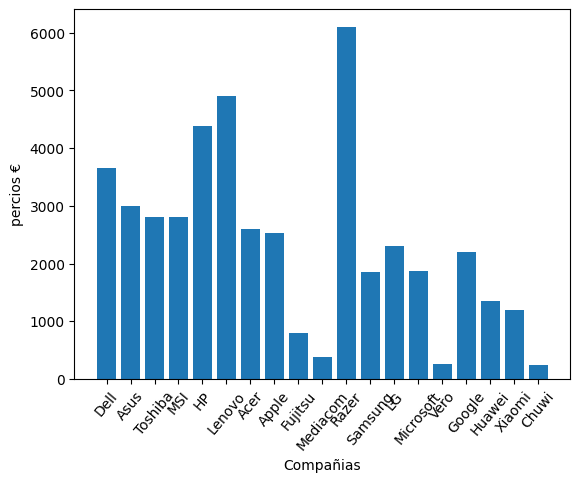

In [1781]:
plt.bar(df["Company"],df["Price_euros"])
plt.xticks(rotation=50)
plt.xlabel("Compañias")
plt.ylabel("percios €");

In [1782]:
df["Company"].value_counts()

Company
Lenovo       208
Dell         207
HP           189
Asus         108
Acer          75
Toshiba       37
MSI           34
Apple         17
Mediacom       7
Razer          6
Samsung        6
Fujitsu        3
Microsoft      3
Vero           3
Xiaomi         3
Chuwi          2
Google         2
LG             1
Huawei         1
Name: count, dtype: int64

In [1783]:
str_num(df["Company"])

C:\Users\UX490U\AppData\Local\Temp\ipykernel_1000\1236849756.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  columna.replace({nombre:posicion},inplace=True)


0      0
1      1
2      2
3      0
4      0
      ..
907    6
908    2
909    6
910    0
911    0
Name: Company, Length: 912, dtype: int64

-----------

In [1784]:
df["Inches"].unique()

array([15.6, 13.3, 12.5, 14. , 17.3, 10.1, 11.6, 15.4, 15. , 12. , 13.5,
       12.3, 13. , 13.9, 18.4])

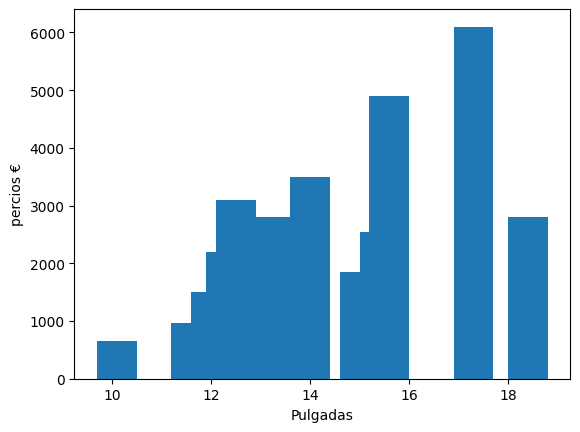

In [1785]:
plt.bar(df["Inches"],df["Price_euros"])
plt.xlabel("Pulgadas")
plt.ylabel("percios €");

In [1786]:
df["Inches"].value_counts()

Inches
15.6    474
14.0    143
13.3    111
17.3    108
12.5     28
11.6     21
12.0      6
10.1      4
13.9      4
15.0      3
15.4      3
13.5      3
12.3      2
13.0      1
18.4      1
Name: count, dtype: int64

---------

In [1787]:
df["TypeName"].unique()

array(['Notebook', 'Gaming', 'Ultrabook', '2 in 1 Convertible', 'Netbook',
       'Workstation'], dtype=object)

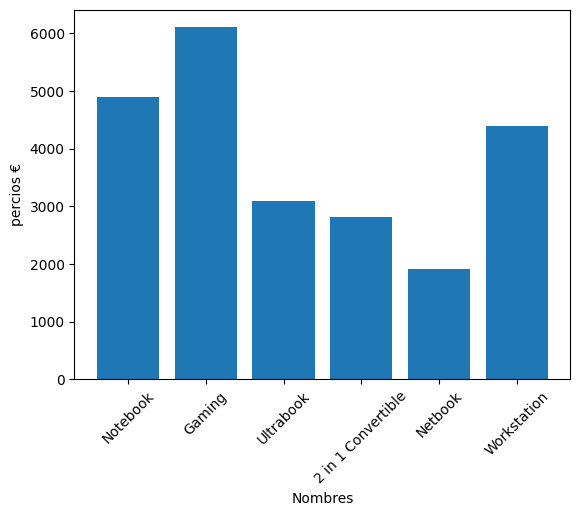

In [1788]:
plt.bar(df["TypeName"],df["Price_euros"])
plt.xticks(rotation=45)
plt.xlabel("Nombres")
plt.ylabel("percios €");

In [1789]:
df["TypeName"].value_counts()

TypeName
Notebook              522
Gaming                138
Ultrabook             135
2 in 1 Convertible     85
Workstation            18
Netbook                14
Name: count, dtype: int64

In [1790]:
str_num(df["TypeName"])

C:\Users\UX490U\AppData\Local\Temp\ipykernel_1000\1236849756.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  columna.replace({nombre:posicion},inplace=True)


0      0
1      0
2      0
3      1
4      2
      ..
907    3
908    0
909    0
910    2
911    0
Name: TypeName, Length: 912, dtype: int64

-----------------

In [1791]:
df["Ram"].unique()

array(['8GB', '4GB', '16GB', '12GB', '6GB', '32GB', '2GB', '24GB'],
      dtype=object)

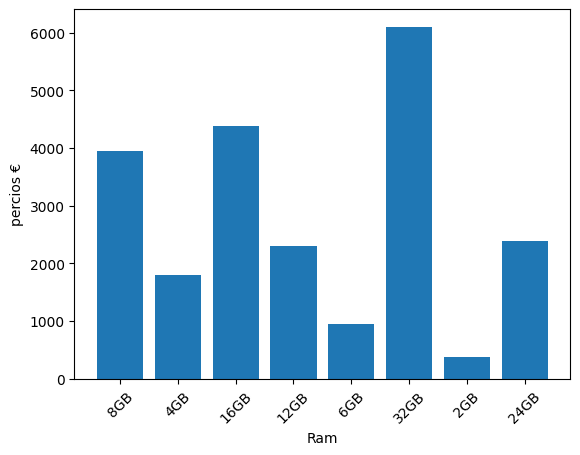

In [1792]:
plt.bar(df["Ram"],df["Price_euros"])
plt.xticks(rotation=45)
plt.xlabel("Ram")
plt.ylabel("percios €");

In [1793]:
df["Ram"].value_counts()

Ram
8GB     434
4GB     274
16GB    125
6GB      32
2GB      16
12GB     15
32GB     14
24GB      2
Name: count, dtype: int64

In [1794]:
df["Ram"]=eliminar_to_num(df["Ram"],"GB",int)

----------------

In [1795]:
df["Memory"].unique()

array(['1TB HDD', '256GB SSD', '256GB SSD +  1TB HDD',
       '512GB SSD +  2TB HDD', '128GB SSD +  1TB HDD', '128GB SSD',
       '1TB SSD', '64GB Flash Storage', '2TB HDD', '500GB HDD',
       '1.0TB Hybrid', '16GB Flash Storage', '256GB Flash Storage',
       '180GB SSD', '32GB Flash Storage', '512GB SSD',
       '512GB SSD +  1TB HDD', '256GB SSD +  500GB HDD',
       '256GB SSD +  2TB HDD', '1TB SSD +  1TB HDD', '64GB SSD',
       '128GB Flash Storage', '256GB SSD +  1.0TB Hybrid', '32GB SSD',
       '512GB Flash Storage', '240GB SSD', '256GB SSD +  256GB SSD',
       '16GB SSD', '8GB SSD', '64GB Flash Storage +  1TB HDD',
       '1.0TB HDD', '1TB HDD +  1TB HDD', '512GB SSD +  512GB SSD',
       '128GB SSD +  2TB HDD', '32GB HDD', '512GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [1796]:
df["Memory"].value_counts()

Memory
256GB SSD                        293
1TB HDD                          150
500GB HDD                        100
512GB SSD                         75
128GB SSD +  1TB HDD              61
128GB SSD                         56
256GB SSD +  1TB HDD              52
32GB Flash Storage                27
2TB HDD                           11
64GB Flash Storage                11
512GB SSD +  1TB HDD              10
1TB SSD                            9
256GB Flash Storage                7
1.0TB Hybrid                       7
32GB SSD                           5
180GB SSD                          5
256GB SSD +  2TB HDD               4
16GB Flash Storage                 4
16GB SSD                           3
512GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
512GB Flash Storage                2
128GB Flash Storage                2
256GB SSD +  1.0TB Hybrid          1
64GB SSD                           1
240GB SSD                      

In [1797]:
df["SSD"] = df["Memory"].str.extract(r'(\d+\.?\d*TB|\d+GB) SSD')
df["HDD"] = df["Memory"].str.extract(r'(\d+\.?\d*TB|\d+GB) HDD')
df["Flash Storage"] = df["Memory"].str.extract(r'(\d+\.?\d*TB|\d+GB) Flash Storage')
df["Hybrid"] = df["Memory"].str.extract(r'(\d+\.?\d*TB|\d+GB) Hybrid')



Una vez separados los tipos de almacenamiento vamos a sumar en cada fila el almacenamiento total. Para ello necesitamos que todo este en las mismas unidades

In [1798]:
def convertir_a_gb(valor):
    if pd.isna(valor):
        return 0 
    if "TB" in valor:
        return int(float(valor.replace("TB", "")) * 1024)  # Convertir TB a GB
    return int(valor.replace("GB", ""))

In [1799]:
df['Storage_SSD'] = df['Memory'].str.contains('SSD').astype(int)
df['Storage_HDD'] = df['Memory'].str.contains('HDD').astype(int)
df['Storage_Flash'] = df['Memory'].str.contains('Flash').astype(int)
df['Storage_Hybrid'] = df['Memory'].str.contains('Hybrid').astype(int)

In [1800]:
# df["SSD"] = df["SSD"].apply(convertir_a_gb)
# df["HDD"] = df["HDD"].apply(convertir_a_gb)
# df["Flash Storage"] = df["Flash Storage"].apply(convertir_a_gb)
# df["Hybrid"] = df["Hybrid"].apply(convertir_a_gb)

In [1801]:
df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,...,Weight,Price_euros,SSD,HDD,Flash Storage,Hybrid,Storage_SSD,Storage_HDD,Storage_Flash,Storage_Hybrid
0,268,1002,0,Inspiron 5567,0,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,...,2.36kg,749.00,NaN,1TB,NaN,NaN,0,1,0,0
1,347,867,1,X541NA (N4200/4GB/1TB/W10),0,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,...,2kg,449.00,NaN,1TB,NaN,NaN,0,1,0,0
2,353,966,2,Portege Z30-C-1CW,0,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,...,1.2kg,1460.00,256GB,NaN,NaN,NaN,1,0,0,0
3,578,767,0,Alienware 17,1,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,...,4.42kg,2868.99,256GB,1TB,NaN,NaN,1,1,0,0
4,42,1241,0,Latitude E7270,2,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,...,1.26kg,1713.37,256GB,NaN,NaN,NaN,1,0,0,0


In [1802]:
#Creamos una columna con el totla de almacenamiento
#df["Total_Almacenamiento_GB"] = df["SSD"] + df["HDD"] + df["Flash Storage"] + df["Hybrid"]


In [1803]:
#df["Total_Almacenamiento_GB"].unique()

---------------

In [1804]:
df["OpSys"].unique()

array(['Windows 10', 'Windows 7', 'Linux', 'Chrome OS', 'No OS',
       'Mac OS X', 'Windows 10 S', 'macOS', 'Android'], dtype=object)

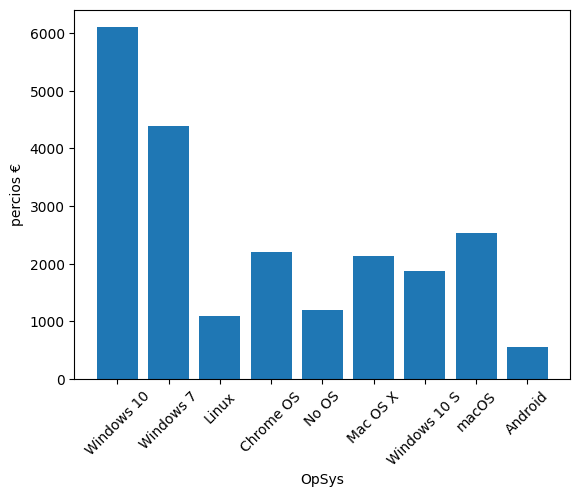

In [1805]:
plt.bar(df["OpSys"],df["Price_euros"])
plt.xticks(rotation=45)
plt.xlabel("OpSys")
plt.ylabel("percios €");

In [1806]:
df["OpSys"].value_counts()

OpSys
Windows 10      746
Linux            47
No OS            44
Windows 7        32
Chrome OS        20
macOS            11
Mac OS X          6
Windows 10 S      4
Android           2
Name: count, dtype: int64

In [1807]:
str_num(df["OpSys"])

C:\Users\UX490U\AppData\Local\Temp\ipykernel_1000\1236849756.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  columna.replace({nombre:posicion},inplace=True)


0      0
1      0
2      1
3      0
4      1
      ..
907    3
908    0
909    0
910    0
911    2
Name: OpSys, Length: 912, dtype: int64

--------------

In [1808]:
df["Weight"].unique()

array(['2.36kg', '2kg', '1.2kg', '4.42kg', '1.26kg', '2.26kg', '2.4kg',
       '1.3kg', '2.5kg', '2.65kg', '2.02kg', '2.2kg', '1.95kg', '1.75kg',
       '1.88kg', '1.74kg', '2.23kg', '3kg', '0.69kg', '2.71kg', '3.35kg',
       '1.78kg', '2.13kg', '2.32kg', '2.18kg', '2.20kg', '2.1kg', '1.7kg',
       '2.3kg', '1.91kg', '2.31kg', '1.4kg', '1.48kg', '2.04kg', '1.54kg',
       '1.86kg', '1.98kg', '1.47kg', '2.67kg', '1.85kg', '1.5kg',
       '0.97kg', '1.6kg', '1.68kg', '2.09kg', '2.33kg', '3.49kg',
       '3.78kg', '1.36kg', '2.77kg', '1.29kg', '1.62kg', '1.05kg',
       '2.05kg', '1.9kg', '1.28kg', '1.49kg', '2.62kg', '2.0kg', '1.63kg',
       '1.37kg', '2.73kg', '2.69kg', '1.25kg', '4.14kg', '2.9kg',
       '1.23kg', '2.37kg', '1.10kg', '1.90kg', '2.63kg', '1.39kg',
       '2.8kg', '2.94kg', '1.43kg', '1.22kg', '2.21kg', '1.32kg', '2.6kg',
       '1.45kg', '1.14kg', '4.36kg', '1.8kg', '1.1kg', '3.3kg', '3.2kg',
       '4.2kg', '1.35kg', '2.19kg', '1.96kg', '4.0kg', '1.84kg', '1.65kg',


In [1809]:
df["Weight"]=eliminar_to_num(df["Weight"],"kg",float)

In [1810]:
df["Weight"].value_counts()

Weight
2.20    89
2.10    40
2.00    37
2.30    35
2.40    31
        ..
1.08     1
1.41     1
2.72     1
1.94     1
1.79     1
Name: count, Length: 151, dtype: int64

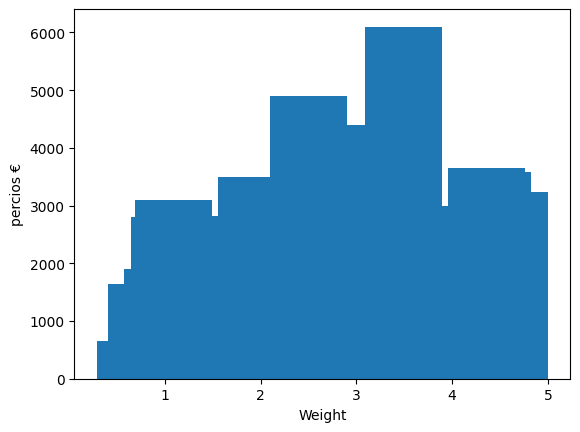

In [1811]:
plt.bar(df["Weight"],df["Price_euros"])
plt.xlabel("Weight")
plt.ylabel("percios €");

-----------------

In [1812]:

df["ScreenResolution"].unique()


array(['1366x768', 'Full HD 1920x1080', 'IPS Panel 4K Ultra HD 3840x2160',
       'Full HD / Touchscreen 1920x1080', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'IPS Panel Touchscreen 1920x1200',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Retina Display 2880x1800', 'IPS Panel 1366x768',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'Quad HD+ / Touchscreen 3200x1800', '4K Ultra HD 3840x2160',
       'IPS Panel 2560x1440', '1600x900', 'Touchscreen 2560x1440',
       'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Retina Display 2304x1440', '1440x900',
       'IPS Panel Retina Display 2560x1600', 'Touchscreen 2256x1504',
       '2560x1440', 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160',
       'IPS Panel Touchscreen 2560x1440', '1920x1080',
       'Touchscreen 2400x1600', 'IPS Panel Full HD 2160x1440',
       'Quad HD+ 3200x1800',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x21

In [1813]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                346
1366x768                                         208
IPS Panel Full HD 1920x1080                      163
IPS Panel Full HD / Touchscreen 1920x1080         37
Full HD / Touchscreen 1920x1080                   32
Touchscreen 1366x768                              15
1600x900                                          11
IPS Panel 4K Ultra HD 3840x2160                   10
4K Ultra HD / Touchscreen 3840x2160                8
Quad HD+ / Touchscreen 3200x1800                   8
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      8
IPS Panel Retina Display 2304x1440                 6
IPS Panel 1366x768                                 5
IPS Panel Retina Display 2560x1600                 5
4K Ultra HD 3840x2160                              5
IPS Panel Quad HD+ / Touchscreen 3200x1800         4
IPS Panel Touchscreen 2560x1440                    4
Touchscreen 2560x1440                              4
IPS Panel Touchscreen 1920x12

In [1814]:
tactil=[]
for i in df["ScreenResolution"]:
    if "Touchscreen" in i:
        tactil.append(1)
    else:
        tactil.append(0)

In [1815]:
df["pantalla_tactil"]=tactil

In [1816]:
df[["pantalla_tactil","ScreenResolution"]].head()

,pantalla_tactil,ScreenResolution
0,0,1366x768
1,0,1366x768
2,0,Full HD 1920x1080
3,0,IPS Panel 4K Ultra HD 3840x2160
4,1,Full HD / Touchscreen 1920x1080


In [1817]:
lista_tamaño=df["ScreenResolution"].str.split(" ")
tamaño_pantalla=[]
for i in lista_tamaño:
    tamaño_pantalla.append(i[-1])


In [1818]:
df["tamaño_pantalla"]=lista_tamaño

In [1819]:
tamaño_num=[]
for i in df["tamaño_pantalla"]:
    tamaño_num.append(i[-1])

In [1820]:
df["tamaño_pantalla"]=tamaño_num

In [1821]:
df["tamaño_pantalla"].unique()

array(['1366x768', '1920x1080', '3840x2160', '1920x1200', '2880x1800',
       '3200x1800', '2560x1440', '1600x900', '2304x1440', '1440x900',
       '2560x1600', '2256x1504', '2400x1600', '2160x1440'], dtype=object)

In [1822]:
ancho_alto=df["tamaño_pantalla"].str.split("x")
ancho_pantalla=[]
alto_pantalla=[]
for i in ancho_alto:
    alto_pantalla.append(i[-1])
    ancho_pantalla.append(i[0])

In [1823]:
df["ancho_pantalla"] =ancho_pantalla
df["alto_pantalla"] =alto_pantalla

In [1840]:
df[["alto_pantalla","ancho_pantalla"]]=df[["alto_pantalla","ancho_pantalla"]].astype(float)

In [1842]:
df["tamaño_pantalla"]=df["alto_pantalla"]*df["ancho_pantalla"]

Hemos sacado una columna para diferenciar entre tactil y no y hemos  multiplicado los numeros para obtener una columna numerica 

-------------

In [1825]:
df["Product"].unique() #MArca-Modelo

array(['Inspiron 5567', 'X541NA (N4200/4GB/1TB/W10)', 'Portege Z30-C-1CW',
       'Alienware 17', 'Latitude E7270', 'ZenBook Flip',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'GP62M 7RDX',
       'UX430UQ-GV209R (i7-7500U/8GB/256GB/GeForce', 'Rog GL553VE-FY052T',
       'X540SA-RBPDN09 (N3710/4GB/1TB/W10)', 'Inspiron 5570',
       'Tecra A50-C-1ZV', '15-cd005nv (A9-9420/6GB/256GB/Radeon',
       'Satellite Pro', 'Latitude 5590', 'Yoga 520-14IKB',
       'Aspire E5-575', 'Thinkpad P51', 'Aspire A517-51G', 'Yoga Book',
       '17-ak002nv (A10-9620P/6GB/2TB/Radeon', 'EliteBook 820',
       'Omen 17-W295', 'Precision M5520',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Extensa EX2540-58KR',
       'IdeaPad 310-15IKB', 'IdeaPad 320-15IAP', 'ProBook 640',
       'Inspiron 3576', 'GL553VE-FY082T (i7-7700HQ/8GB/1TB',
       'B51-80 (i7-6500U/8GB/1008GB/Radeon', 'Vostro 3568',
       'Chromebook CB5-571-C1DZ', 'IdeaPad 320-15ABR', 'Inspiron 3552',
       'X553SA-XX021T (N305

Esta columna en principio no la vamos a usar ya que la mayoría de la información util como la marca o la memoria ya la tenemos.

-----------------

In [1826]:
df["Cpu"].head()

0              Intel Core i7 7500U 2.7GHz
1    Intel Pentium Quad Core N4200 1.1GHz
2              Intel Core i5 6200U 2.3GHz
3             Intel Core i7 7700HQ 2.8GHz
4              Intel Core i5 6300U 2.4GHz
Name: Cpu, dtype: object

In [1827]:
lista1=df['Cpu'].str.split(" ")

Una vez separados los str de Cpu seleccionamos velocidad del procesador y marca del fabricante como datos relevantes que pueden influir en el precio del portatil. Creamos dos nuevas columns, una numerica y otra categorica

In [1828]:
marca_fabricante=[]
velocidad_procesador=[]
for i in lista1:
    marca_fabricante.append(i[0])
    velocidad_procesador.append(i[-1])
    

In [1829]:
df["marca_fabricante"]=marca_fabricante
df["velocidad_procesador"]=velocidad_procesador

In [1838]:
df["velocidad_procesador"]=eliminar_to_num(df["velocidad_procesador"],"GHz",float)

---------------

In [1832]:
df["Gpu"].unique()
# dividimos por str que tengan Nvidia,Intel, AMD

array(['AMD Radeon R7 M445', 'Intel HD Graphics 505',
       'Intel HD Graphics 520', 'Nvidia GeForce GTX 1070',
       'Nvidia GeForce GT 940MX', 'Nvidia GeForce GTX 1050',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 405', 'Intel UHD Graphics 620',
       'AMD Radeon 530', 'Intel HD Graphics 510', 'Intel HD Graphics 620',
       'Nvidia Quadro M2200M', 'Nvidia GeForce MX150',
       'Intel HD Graphics 400', 'Nvidia Quadro M1200',
       'Nvidia GeForce 920MX', 'Intel HD Graphics 500', 'AMD Radeon 520',
       'AMD Radeon R5 M330', 'AMD Radeon R5 M420X', 'Intel HD Graphics',
       'Intel HD Graphics 630', 'AMD Radeon R5 M430',
       'Intel Iris Pro Graphics', 'Nvidia GeForce GTX 940MX',
       'Intel HD Graphics 515', 'Nvidia GeForce GTX 1080',
       'AMD Radeon R2 Graphics', 'Nvidia GeForce 150MX', 'AMD Radeon R5',
       'Nvidia GeForce GTX 1050Ti', 'AMD Radeon R9 M385',
       'Nvidia GeForce 930MX', 'Nvidia GeForce GTX 1060',
       'Nv

In [1833]:
gpu_str=df['Gpu'].str.split(" ")

In [1834]:
tipo_gpu=[]
for i in gpu_str:
    tipo_gpu.append(i[0])

In [1835]:
df["tipo_gpu"]=tipo_gpu

In [1836]:
df["tipo_gpu"]

0         AMD
1       Intel
2       Intel
3      Nvidia
4       Intel
        ...  
907     Intel
908     Intel
909       AMD
910     Intel
911       AMD
Name: tipo_gpu, Length: 912, dtype: object

In [ ]:
str_num(df["tipo_gpu"])

----------------

In [1663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       912 non-null    int64  
 1   laptop_ID                912 non-null    int64  
 2   Company                  912 non-null    object 
 3   Product                  912 non-null    object 
 4   TypeName                 912 non-null    object 
 5   Inches                   912 non-null    float64
 6   ScreenResolution         912 non-null    object 
 7   Cpu                      912 non-null    object 
 8   Ram                      912 non-null    int64  
 9   Memory                   912 non-null    object 
 10  Gpu                      912 non-null    object 
 11  OpSys                    912 non-null    object 
 12  Weight                   912 non-null    float64
 13  Price_euros              912 non-null    float64
 14  SSD                      9

-----------

In [1844]:
company_price = df.groupby('Company')['Price_euros'].describe()
company_price = company_price['50%'].reset_index()

In [1846]:
company_price.rename(columns={'50%':'company_price'},inplace=True)
type_price = df.groupby('TypeName')['Price_euros'].describe()
type_price = type_price['50%'].reset_index()
type_price.rename(columns={'50%':'type_price'},inplace=True)

In [1848]:
type_price

,TypeName,type_price
0,0,689.0
1,1,1498.5
2,2,1495.0
3,3,1159.0
4,4,269.0
5,5,2239.0


Vamos a crear dos DataFrame, uno de variables categóricas y otro de numéricas. De este modo podremos analizar y crear los modelos de forma más sencilla

In [1664]:
df_cat=df[['Company','TypeName','OpSys','pantalla_tactil','marca_fabricante','tipo_gpu','Price_euros']]
df_num=df[['Inches','ancho_pantalla', 'alto_pantalla','Ram','Total_Almacenamiento_GB','Weight','velocidad_procesador','Price_euros']]

--------------

## **ANÁLISIS**

<Axes: >

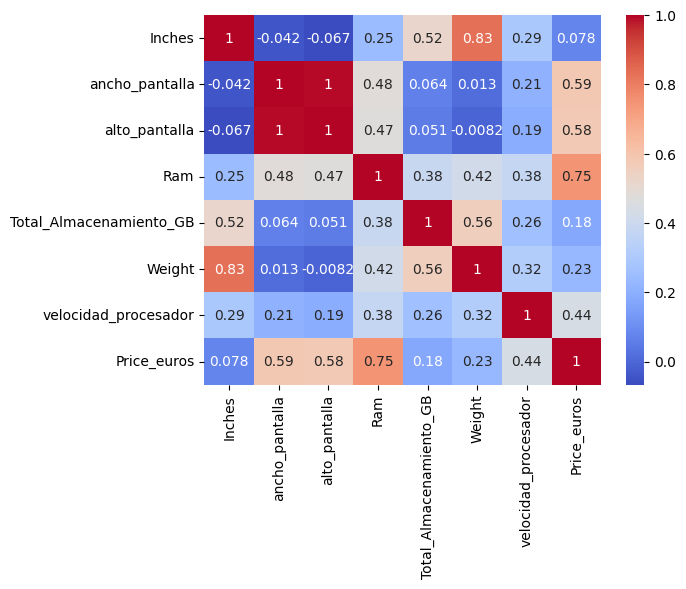

In [1665]:
sns.heatmap(df_num.corr(),annot=True,cmap="coolwarm")

Viendo la correlación entre las variables numericas podríamos crear el modelo con el RAM , ANCHO y ALTO

In [1666]:
df_num.describe()

,Inches,ancho_pantalla,alto_pantalla,Ram,Total_Almacenamiento_GB,Weight,velocidad_procesador,Price_euros
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,15.011404,1890.050439,1067.899123,8.188596,603.372807,2.032112,2.287895,1108.122873
std,1.411744,506.007321,290.338307,4.899827,468.827204,0.653772,0.513277,714.597741
min,10.100000,1366.000000,768.000000,2.000000,8.000000,0.690000,0.900000,174.000000
25%,14.000000,1366.000000,768.000000,4.000000,256.000000,1.500000,2.000000,589.000000
50%,15.600000,1920.000000,1080.000000,8.000000,500.000000,2.040000,2.500000,949.000000
75%,15.600000,1920.000000,1080.000000,8.000000,1024.000000,2.300000,2.700000,1458.500000
max,18.400000,3840.000000,2160.000000,32.000000,2560.000000,4.600000,3.600000,6099.000000


---------------

# **MODELOS SUPERVISADOS**

In [1667]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1668]:
df_num.columns

Index(['Inches', 'ancho_pantalla', 'alto_pantalla', 'Ram',
       'Total_Almacenamiento_GB', 'Weight', 'velocidad_procesador',
       'Price_euros'],
      dtype='object')

In [1669]:
X1=df_num[['Ram','velocidad_procesador','alto_pantalla','ancho_pantalla']]
y1=df["Price_euros"]

In [1670]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(729, 4)
(183, 4)
(729,)
(183,)


In [1671]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X1_train)
X_test_scal = scaler.transform(X1_test)

In [1672]:
from sklearn import metrics
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2 score", model.score(X_test, y_test))
    print("MAE", metrics.mean_absolute_error(y_test, y_pred))
    print("MSE", metrics.mean_squared_error(y_test, y_pred))
    print("RMSE", metrics.mean_squared_error(y_test, y_pred) ** (1/2))
    return model

In [1673]:
model= train_evaluate_model(LinearRegression(), X1_train, y1_train, X1_test, y1_test)
model

R2 score 0.631247047197426
MAE 272.8416941487231
MSE 159266.65059099323
RMSE 399.0822604313467


LinearRegression()

In [1674]:
model_1 = train_evaluate_model(LinearRegression(), X_train_scal, y1_train, X_test_scal, y1_test)
model_1

R2 score 0.6312470471974223
MAE 272.84169414872383
MSE 159266.65059099483
RMSE 399.0822604313487


LinearRegression()

No hay variaci´´on si escalamos o no le modelo

----------------

# **MODELOS CATEGÓRICOS**

------------

# **UNIÓN DE MODELOS**

___________________________________________________________________________________________

# **Predicciones**.

In [1681]:
df_portatiles=pd.read_csv("test.csv")

In [1682]:
df_portatiles.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,181,1098,HP,Spectre x360,Ultrabook,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.3kg
1,708,330,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8GB,256GB SSD,AMD Radeon RX 540,Windows 10,2.2kg
2,862,1260,Acer,Aspire ES1-572,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,500GB HDD,Intel HD Graphics 520,Linux,2.4kg
3,1064,1137,HP,EliteBook 1040,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg
4,702,1015,HP,ENVY -,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.34kg


In [1683]:
X_portatiles=df_portatiles[["Inches"]]

In [1684]:
y_pred_portatiles = model_1.predict(X_portatiles)

c:\Users\UX490U\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 4 features as input.

In [1179]:
y_pred_portatiles = np.round(y_pred_portatiles, 2)

In [1180]:
subir=pd.DataFrame({"id":df_portatiles["id"],"Price_euros":y_pred_portatiles})

In [1181]:
subir

,id,Price_euros
0,181,8416.65
1,708,9678.13
2,862,9678.13
3,1064,8800.58
4,702,8416.65
...,...,...
386,1281,9678.13
387,524,9678.13
388,1015,9678.13
389,1236,9678.13


In [1182]:
subir.to_csv("submission.csv", index=False)